In [1]:
# For reading data filenames 
import glob


# For calculating Time 
import datetime


# For processing data
import math
import pandas as pd
import numpy as np

## For Features Creation
from feature_engineering import *

## For Model Building
import lightgbm as lgb


## For Model Evaluation
from sklearn.metrics import accuracy_score, roc_curve, auc, confusion_matrix, accuracy_score


## For Sequence Model
from sklearn.utils import class_weight
from keras import Sequential
from keras.layers import Dense, LSTM

## For Plotting Graphs
import matplotlib
import matplotlib.pyplot  as plt

## For ignoring Warning
import warnings
warnings.filterwarnings('ignore')
matplotlib.rcParams['figure.figsize'] = [16, 10]


Using TensorFlow backend.


In [2]:
## Load the data and sorted the data at boookingID*second level

def data_load_fun(train_path):
    start = datetime.datetime.now().replace(microsecond=0)
    features = pd.DataFrame()
    filename = []
    for files in glob.glob(train_path):
        filename.append(files)
    for file in filename:
        print (file)
        tmp_df = pd.read_csv(file)
        features = pd.concat([features,tmp_df], axis=0)
    features = features.sort_values(by= ['bookingID',"second"])
    end = datetime.datetime.now().replace(microsecond=0)
    print (len(filename), " Files Loaded Successfuly; Time Taken -->" ,end-start)
    return features

In [3]:
train_path = '../01_Data/Train/*.csv'
features = data_load_fun(train_path)

../01_Data/Train/part-00001-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00007-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00002-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00003-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00004-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00008-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00009-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00006-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00005-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
../01_Data/Train/part-00000-e6120af0-10c2-4248-97c4-81baf4304e5c-c000.csv
10  Files Loaded Successfuly; Time Taken --> 0:00:54


In [4]:
#f = features[features.bookingID <10]
#f.to_csv('../01_Data/Train/sample.csv',index = False)

In [5]:
features_cleaning = features[features.second<10000]

In [6]:
trip_dur_info = features_cleaning.groupby(['bookingID'])['second'].count().reset_index()

In [7]:
min(trip_dur_info['second'])

120

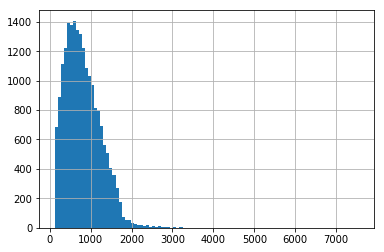

In [8]:
trip_dur_info['second'].hist(bins=100)

In [9]:
data_dict = pd.read_excel('../01_Data/data_dictionary.xlsx')
data_dict.head(1)

,Unnamed: 0,bookingID,Accuracy,Bearing,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,second,Speed
0,description,trip id,accuracy inferred by GPS in meters,GPS bearing,accelerometer reading in x axis (m/s2),accelerometer reading in y axis (m/s2),accelerometer reading in z axis (m/s2),gyroscope reading in x axis (rad/s),gyroscope reading in y axis (rad/s),gyroscope reading in z axis (rad/s),time of the record by number of seconds,speed measured by GPS in m/s


In [10]:
sample_id = 180388626580
sample_1 = data[data.bookingID==sample_id]

fig = plt.figure(figsize=(15,10))
staring = 331
count=0
window = int(sample_1.shape[0]/100)
staring = int(str(1) + str(window) + str(1))
for i in range(window):
    ax = fig.add_subplot(staring+count); count+=1
    plt.plot(sample_1.second[100*i:100*(i+1)], sample_1.acceleration_x[100*i:100*(i+1)
    plt.title(col)

SyntaxError: invalid syntax (<ipython-input-10-70a4a6027883>, line 12)

In [ ]:
sample_id = 0
sample_0 = data[data.bookingID==sample_id]

fig = plt.figure(figsize=(15,10))
staring = 331
count=0
for col in cols:
    ax = fig.add_subplot(staring+count); count+=1
    plt.plot(sample_0.second, sample_0[col])
    plt.title(col)

In [ ]:
acc_info = data.groupby(['bookingID']) ['Accuracy', 'Bearing', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z', 'Speed'].mean().reset_index()
acc_info = pd.merge(acc_info,labels, on= ['bookingID'], how="left")

In [ ]:
acc_info[acc_info.Accuracy <10].Accuracy.hist()

In [ ]:
acc_info[acc_info.Accuracy>100].head()

In [ ]:
data[data.Accuracy>100].acceleration_x.mean()

In [ ]:
100*data[data.Accuracy<10].shape[0]/data.shape[0]

In [ ]:
data[(data.Accuracy<10)&(data.acceleration_x<0)].head()

In [ ]:
data[(data.Speed<0) & (data.Accuracy<100)].Accuracy.mean()

In [ ]:
data[data.Accuracy>100].Speed.hist()

In [ ]:
sample_1['acc'] = np.sqrt(sample_1.acceleration_x*sample_1.acceleration_x + \
sample_1.acceleration_y*sample_1.acceleration_y +sample_1.acceleration_z*sample_1.acceleration_z)


In [ ]:
plt.scatter(sample_0.Speed,sample_0.Accuracy)